# least square 

In [13]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


In [14]:
x = 2 * np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)
x.shape

(100, 1)

In [ ]:
y

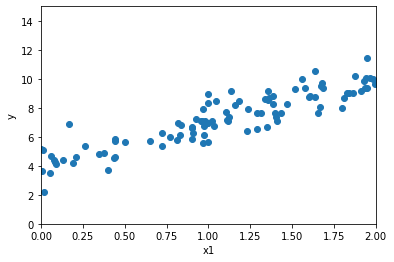

In [15]:
plt.scatter(x,y)
plt.xlabel('x1')
plt.ylabel('y')
plt.axis([0,2,0,15])
plt.show()

In [16]:
# add one column x0 ==1 to control the basis term
one = np.ones((100,1))
x_2 = np.hstack((one,x))


In [ ]:
x_2

In [17]:
theta_best = np.linalg.inv((x_2.T).dot(x_2)).dot(x_2.T).dot(y)
theta_best


array([[4.03424778],
       [2.96507397]])

In [18]:
x_test = np.array([[0],[2]])
one1=np.ones((2,1))
x_test_1=np.hstack((one1,x_test))

In [19]:
print(x_test_1)

[[1. 0.]
 [1. 2.]]


In [21]:
y_pred = x_test_1.dot(theta_best)
y_pred

array([[4.03424778],
       [9.96439573]])

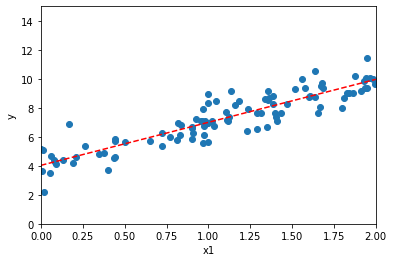

In [22]:
plt.scatter(x,y)
plt.plot(x_test, y_pred, 'r--')
plt.xlabel('x1')
plt.ylabel('y')
plt.axis([0,2,0,15])
plt.show()

# Gradient descent

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[2.96507397]]
[4.03424778]


## batch gradient descent

In [24]:
learning_rate = 0.05
n_iterator =100
m=100
theta = np.random.randn(2,1)
for iteration in range(n_iterator):
  gradients = 2/m * x_2.T.dot(x_2.dot(theta)-y)
  theta = theta - gradients*learning_rate

In [25]:
theta

array([[3.98336831],
       [3.00541082]])

In [26]:
y_pred_batch = x_test_1.dot(theta)
y_pred_batch

array([[3.98336831],
       [9.99418996]])

In [27]:
theta_path_bgd = []
def plot_gradient_curve(theta, learning_rate,theta_path=None):
  m = len(x)
  plt.scatter(x,y)
  n_iternations=1000
  for iteration in range(n_iternations):
    y_pred = x_test_1.dot(theta)
    plt.plot(x_test, y_pred, 'r--')
    gradients = 2/m * x_2.T.dot(x_2.dot(theta)-y)
    theta = theta - gradients*learning_rate
    if theta_path is not None:
      theta_path_bgd.append(theta)
    plt.xlabel('x1')
    plt.axis([0,2,0,15])
    plt.title('eta={}'.format(learning_rate))

In [28]:
x_2.shape

(100, 2)

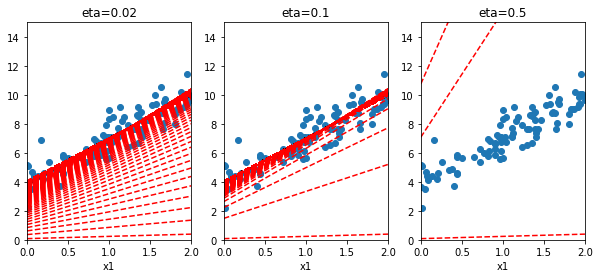

In [29]:
theta = np.random.randn(2,1)
plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_curve(theta, learning_rate=0.02)
plt.subplot(132)
plot_gradient_curve(theta, learning_rate=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_curve(theta, learning_rate=0.5)

## Random gradient descent

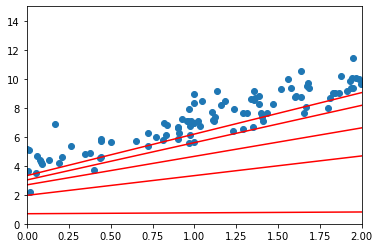

In [30]:
theta_path_sgd = []
m=len(x_2)
n_epochs = 50

# leaning rate decreasing
t0 =5
t1 = 50
def learning_desc(t):
  return t0/(t1+t)
theta = np.random.randn(2,1)
for n_epoch in range(n_epochs):
  for i in range(m):
    if n_epoch <1 and i<5:
      y_pred = x_test_1.dot(theta)
      plt.plot(x_test, y_pred, 'r-')
    random_index = np.random.randint(m)
    xi = x_2[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
    eta = learning_desc(n_epoch*m+i)
    theta = theta - eta*gradients
    theta_path_sgd.append(theta)
plt.scatter(x,y)
plt.axis([0,2,0,15])
plt.show()



## mini batch gradient descent 

In [31]:
theta_path_mgd = []
n_epochs = 50
minibatch =16
theta = np.random.randn(2,1)
#random seed

t = 0
for epoch in range(n_epochs):
  shuffled_index = np.random.permutation(m)
  x_2_shuffled = x_2[shuffled_index]
  y_shuffled = y[shuffled_index]
  for i in range(0, m, minibatch):
    t += 1
    xi = x_2_shuffled[i:i+minibatch]
    yi = y_shuffled[i:i+minibatch]
    gradients = 2/minibatch * xi.T.dot(xi.dot(theta)-yi)
    eta = learning_desc(t)
    theta = theta - eta*gradients
    theta_path_mgd.append(theta)


In [32]:
theta

array([[4.05678962],
       [2.94747388]])

# Compare gradient descent 

In [33]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

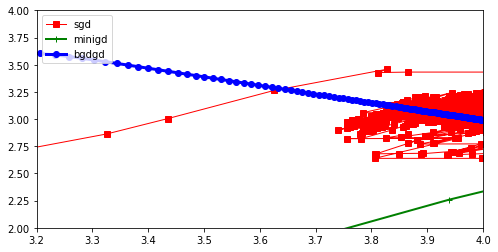

In [34]:
plt.figure(figsize=(8,4))
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1], 'r-s', linewidth=1, label='sgd')
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1], 'g-+', linewidth=2, label='minigd')
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1], 'b-o', linewidth=3, label='bgdgd')
plt.legend(loc='upper left')
plt.axis([3.2, 4, 2, 4])
plt.show()

# Polynomial regression

In [35]:
m =100
x = 6*np.random.rand(m,1)-3
y = 0.5*x**2+x+np.random.randn(m,1)

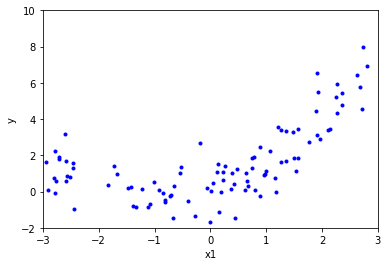

In [36]:
plt.plot(x,y,'b.')
plt.xlabel('x1')
plt.ylabel('y')
plt.axis([-3,3,-2,10])
plt.show()

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature=PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_feature.fit_transform(x)

In [38]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.91711882 0.49127518]]
[0.16114511]


In [39]:
x_new = np.linspace(-3,3,100).reshape(100,1)
x_new_poly = poly_feature.transform(x_new)
y_pred = lin_reg.predict(x_new_poly)


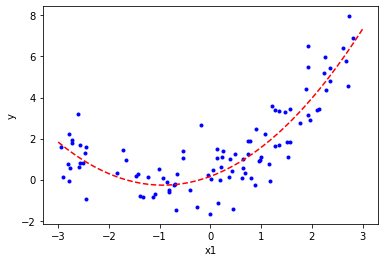

In [40]:
plt.plot(x,y,'b.')
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(x_new, y_pred, 'r--')
plt.show()

## Using pipeline analyze the overfitting risk 

## effects of degree

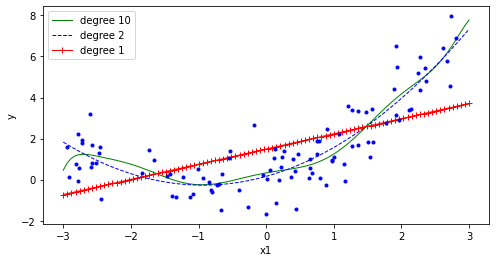

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
plt.figure(figsize = (8,4))
for style, width,degree in (('g-',1,10), ('b--',1,2),('r-+',1,1)):
  poly_feature = PolynomialFeatures(degree=degree, include_bias =True)
  std = StandardScaler()
  lin_reg = LinearRegression()
  Poly_reg = Pipeline([('Poly_featuyres', poly_feature),
       ('standardscale', std),
       ('lin_reg', lin_reg)])
  Poly_reg.fit(x,y)
  y_new_2=Poly_reg.predict(x_new)
  plt.plot(x_new,y_new_2, style, label="degree "+str(degree), linewidth=width)
plt.plot(x,y,'b.')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()



## effects of data size 

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learn_curves(model,x,y):
  x_train, x_val, y_train, y_val=train_test_split(x, y, train_size=0.8, random_state=40)
  train_errors, val_errors = [],[]
  for m in range(1, len(x_train)):
    model.fit(x_train[:m], y_train[:m])
    y_train_predict = model.predict(x_train[:m])
    y_val_pred = model.predict(x_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_pred))
  plt.plot(np.sqrt(train_errors), 'r-', linewidth=2, label='train_error')
  plt.xlabel("sample size")
  plt.ylabel("RSR")
  plt.plot(np.sqrt(val_errors),'b--',linewidth=3,label='val_error')
  plt.legend()





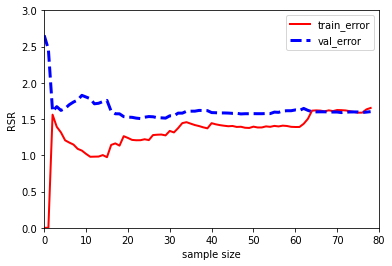

In [49]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
plot_learn_curves(lin_reg, x, y)
plt.axis([0,80,0,3])
plt.show()

The difference between training set and validation set can not be very large. The difference is large which means there's potential risk of overfitting

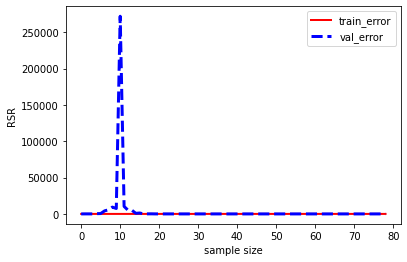

In [50]:
Poly_reg = Pipeline([('Poly_featuyres', PolynomialFeatures(degree=10, include_bias =True)),
       ('lin_reg', LinearRegression())])
plot_learn_curves(Poly_reg,x,y)
plt.show()

Degee is larger, the risk of overfitting is very large

# regularization

To solve overfitting, choose small Regularization value

- Ridge: J(theta)=MSE(theta)+alpha*1/2+sum(theta(i)^2)
- Lasso: J(theta)=MSE(theta)+alpha*|theta|
alpha represent the weight of the regularizaiton 

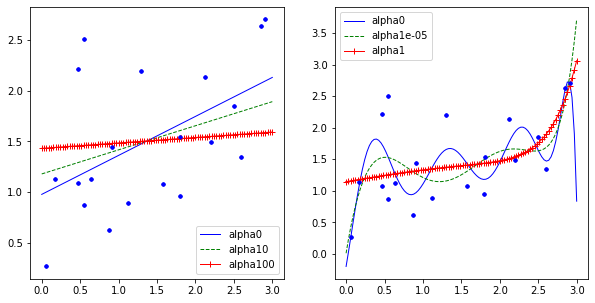

In [63]:
from sklearn.linear_model import Ridge
np.random.seed(42)
m=20
x = 3*np.random.rand(m,1)
y = 0.5*x+np.random.randn(m,1)/1.5+1
x_new = np.linspace(0,3,100).reshape(100,1)
def plot_model(model_class, polynomial, alphas, **model_kargs):
  for alphas, style in zip(alphas, ('b-', 'g--','r-+')):
    model = model_class(alphas, **model_kargs)
    if polynomial:
      model = Pipeline([("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                        ("standardScalar", StandardScaler()),
                        ("lin_reg", model)])
    model.fit(x,y)
    y_new_regul = model.predict(x_new)
    
    plt.plot(x_new, y_new_regul, style, linewidth=1, label='alpha{}'.format(alphas))
    plt.plot(x,y,'b.')
    plt.legend()
plt.figure(figsize=(10,5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0,10,100))
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0,10**-5,1))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.446e+00, tolerance: 9.295e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, p

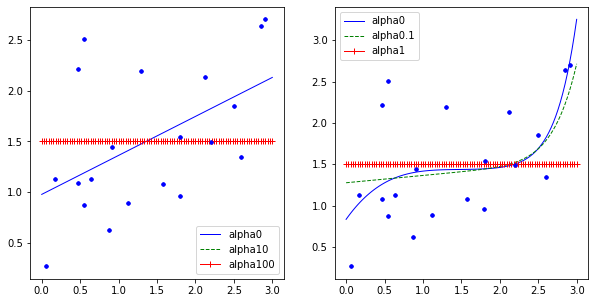

In [81]:
from sklearn.linear_model import Lasso


plt.figure(figsize=(10,5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0,10,100))
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0,10**-1,1))

plt.show()